# 08. Multiple Linear Regression&Polynomial Regression

- Multiple Linear Regression: Metode statistik untuk memodelkan hubungan antara beberapa variabel independen (fitur) dan variabel dependen (target) dengan asumsi hubungan linier.
- 
Polynomial Regression: Varian dari regresi linear yang memodelkan hubungan antara variabel independen dan dependen sebagai polinomial, memungkinkan untuk menangkap hubungan yang lebih kompleks daripada regresi linear biasa.

# Sample Dataset

In [1]:
#Training Dataset

import pandas as pd
pizza = {'diameter' :[6,8,10,14,18],
         'n_topping':[2,1,0,2,0],
         'harga':[7,9,13,17.5,18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


In [10]:
#Testing Dataset

pizza={'diameter':[8,9,11,16,12],
       'n_topping':[2,0,2,2,0],
       'harga':[11,8.5,15,18,11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


# Preprocessing Dataset

In [7]:
import numpy as np

X_train = np.array(train_pizza_df[['diameter','n_topping']])
y_train= np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train:{y_train}')

X_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train:[ 7.   9.  13.  17.5 18. ]


In [11]:
X_test = np.array(test_pizza_df[['diameter','n_topping']])
y_test= np.array(test_pizza_df['harga'])

print(f'X_test:\n{X_test}\n')
print(f'y_test:{y_test}')

X_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test:[11.   8.5 15.  18.  11. ]


In [14]:
#Multiple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r_squared:{r2_score(y_test, y_pred)}')

r_squared:0.7701677731318468


In [15]:
#Polynomial Regression

X_train = np.array(train_pizza_df['diameter']).reshape(-1,1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train:{y_train}')

X_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train:[ 7.   9.  13.  17.5 18. ]


# Polynomial Regression:Quadratic

In [19]:
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')


X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



In [20]:
# Training Model
model = LinearRegression()
model.fit(X_train_quadratic,y_train)

LinearRegression()

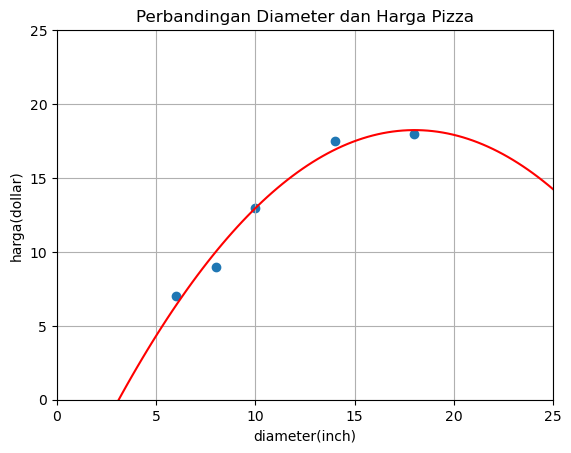

In [25]:
#Visualisasi Model

import matplotlib.pyplot as plt

x_vis = np.linspace(0,25,100).reshape(-1,1)
x_vis_quadratic =quadratic_feature.transform(x_vis)
y_vis_quadratic = model.predict(x_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(x_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('diameter(inch)')
plt.ylabel('harga(dollar)')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()


# Polynomial Regression : Quadratic vs Cubic

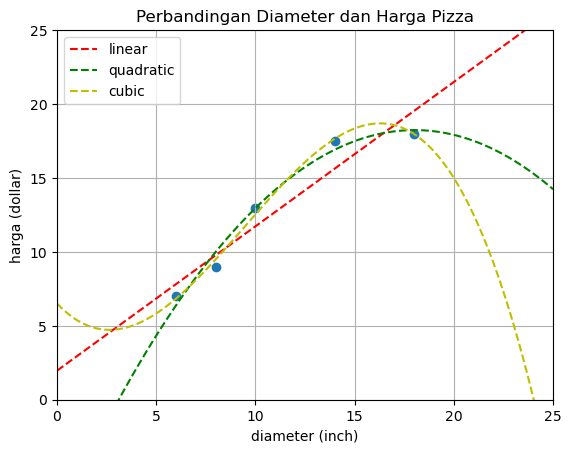

In [26]:
# Training Set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
x_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(x_vis)
plt.plot(x_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis = model.predict(x_vis_quadratic)
plt.plot(x_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
x_vis_cubic = cubic_feature.transform(x_vis)
y_vis = model.predict(x_vis_cubic)
plt.plot(x_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('diameter (inch)')
plt.ylabel('harga (dollar)')
plt.legend()
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()